# EDA

## Cargar y Explorar

In [105]:
import pandas as pd
file_path=r'..\data\idealista_bcn_sale_08_2025.csv'
df= pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   5000 non-null   int64  
 1   propertyCode            5000 non-null   int64  
 2   thumbnail               4967 non-null   object 
 3   externalReference       4372 non-null   object 
 4   numPhotos               5000 non-null   int64  
 5   floor                   3532 non-null   object 
 6   price                   5000 non-null   float64
 7   priceInfo               5000 non-null   object 
 8   propertyType            5000 non-null   object 
 9   operation               5000 non-null   object 
 10  size                    5000 non-null   float64
 11  exterior                3508 non-null   object 
 12  rooms                   5000 non-null   int64  
 13  bathrooms               5000 non-null   int64  
 14  address                 5000 non-null   

In [106]:
display(df.head())

,index,propertyCode,thumbnail,externalReference,numPhotos,floor,price,priceInfo,propertyType,operation,...,has360,hasStaging,savedAd,notes,topNewDevelopment,topPlus,parkingSpace,highlight,neighborhood,newDevelopmentFinished
0,0,108933600,https://img4.idealista.com/blur/480_360_mq/0/i...,295642,30,4,300000.0,"{'price': {'amount': 300000.0, 'currencySuffix...",flat,sale,...,False,False,{},[],False,False,NaN,NaN,NaN,NaN
1,1,108932312,https://img4.idealista.com/blur/480_360_mq/0/i...,HZ21846,70,NaN,650000.0,"{'price': {'amount': 650000.0, 'currencySuffix...",chalet,sale,...,False,False,{},[],False,False,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN,NaN
2,2,108932560,https://img4.idealista.com/blur/480_360_mq/0/i...,TOE-2524,67,6,570000.0,"{'price': {'amount': 570000.0, 'currencySuffix...",duplex,sale,...,False,False,{},[],False,False,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN,NaN
3,3,108933084,https://img4.idealista.com/blur/480_360_mq/0/i...,auto,19,NaN,390600.0,"{'price': {'amount': 390600.0, 'currencySuffix...",chalet,sale,...,False,False,{},[],False,False,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",{'groupDescription': 'Destacado'},NaN,NaN
4,4,108933074,https://img4.idealista.com/blur/480_360_mq/0/i...,CMSMQ250,22,NaN,250000.0,"{'price': {'amount': 250000.0, 'currencySuffix...",chalet,sale,...,False,False,{},[],False,False,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN,NaN


In [107]:
df.describe()

,index,propertyCode,numPhotos,price,size,rooms,bathrooms,latitude,longitude,priceByArea
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2499.500000,1.084732e+08,26.408400,327021.644000,140.303400,3.031400,1.628200,41.466525,2.125443,3277.334000
std,1443.520003,2.348531e+06,16.143387,173273.682762,1493.840356,1.184861,0.793783,0.136456,0.206815,1624.827655
min,0.000000,3.099994e+07,0.000000,90000.000000,20.000000,0.000000,0.000000,41.196342,1.511564,1.000000
25%,1249.750000,1.087946e+08,16.000000,191000.000000,69.000000,2.000000,1.000000,41.376894,2.035553,2131.750000
50%,2499.500000,1.088432e+08,25.000000,280000.000000,89.000000,3.000000,1.000000,41.434092,2.144304,2926.500000
75%,3749.250000,1.088903e+08,34.000000,420000.000000,127.000000,4.000000,2.000000,41.549821,2.201688,4156.000000
max,4999.000000,1.089336e+08,161.000000,850000.000000,105500.000000,12.000000,10.000000,42.256445,2.764981,12333.000000


In [108]:
import numpy as np
df_clean = df.copy()

# --- 2. Reemplazar ceros sospechosos por NaN ---
cols_check = ['rooms', 'bathrooms', 'size', 'priceByArea','floor']
df_clean[cols_check]=df_clean[cols_check].fillna(0)

# --- 3. Filtros básicos de outliers ---
# Limitar tamaño a un rango razonable (20 m² - 500 m²)
df_clean = df_clean[(df_clean['size'] >= 20) & (df_clean['size'] <= 500)]

# Limitar precio por m² (€/m²)
df_clean = df_clean[(df_clean['priceByArea'] >= 1000) & (df_clean['priceByArea'] <= 10000)]

# Log-transform del precio
df_clean['log_price'] = np.log1p(df_clean['price'])

# Categorías por tamaño
df_clean['cat_size'] = pd.cut(
    df_clean['size'],
    bins=[0, 50, 90, 150, 500],
    labels=['Pequeña', 'Mediana', 'Grande', 'Muy Grande']
)

# --- 4 corrección de floor y exterior para chalet, countryHouse y penthouse
mask = df_clean["propertyType"].isin(["chalet", "countryHouse", "penthouse"])

df_clean.loc[mask, "floor"]    = 0
df_clean.loc[mask, "exterior"] = 1

# --- 5 categorización de variable floor
bajo_vals = ["bj", "en", "st", "pr", "ss", "-1", "+1"]
def limpiar_floor(val):
    try:
        val = str(val).lower().strip()
        if val in bajo_vals:
            return 0
        elif val in ["4rt"]:
            return 4  # caso raro, puedes personalizarlo
        return int(val)
    except:
        return None

df_clean["floor_clean"] = df_clean["floor"].apply(limpiar_floor)

def agrupar_floor(val):
    if pd.isna(val):
        return None
    elif val == 0:
        return "0"
    elif val == 1:
        return "1"
    elif val == 2:
        return "2"
    elif val in [3,4]:
        return "3-4"
    else:
        return "5+"

df_clean["floor_grouped"] = df_clean["floor_clean"].apply(agrupar_floor)
orden = ["0", "1", "2", "3-4","5+"]
df_clean["floor_grouped"] = pd.Categorical(df_clean["floor_grouped"], categories=orden, ordered=True)

## ---6 imputar valores a la variables hasLift nan a 0 y True por 1
df_clean['hasLift'] = df_clean['hasLift'].fillna(0)
df_clean['hasLift'] = df_clean['hasLift'].replace({'True': 1, 'False': 0, '0': 0}).astype(int)

# --- 6. Selección de columnas finales ---
columnas_finales = [
    'propertyCode', 'price','log_price','municipality','propertyType','size','cat_size', 'rooms', 
    'bathrooms','floor_grouped','hasLift','latitude','longitude'
]

df_final = df_clean[columnas_finales]


In [109]:
print(df_final.isna().sum())

propertyCode     0
price            0
log_price        0
municipality     0
propertyType     0
size             0
cat_size         0
rooms            0
bathrooms        0
floor_grouped    0
hasLift          0
latitude         0
longitude        0
dtype: int64


In [110]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4829 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   propertyCode   4829 non-null   int64   
 1   price          4829 non-null   float64 
 2   log_price      4829 non-null   float64 
 3   municipality   4829 non-null   object  
 4   propertyType   4829 non-null   object  
 5   size           4829 non-null   float64 
 6   cat_size       4829 non-null   category
 7   rooms          4829 non-null   int64   
 8   bathrooms      4829 non-null   int64   
 9   floor_grouped  4829 non-null   category
 10  hasLift        4829 non-null   int64   
 11  latitude       4829 non-null   float64 
 12  longitude      4829 non-null   float64 
dtypes: category(2), float64(5), int64(4), object(2)
memory usage: 462.6+ KB


In [111]:
df_final.describe()

,propertyCode,price,log_price,size,rooms,bathrooms,hasLift,latitude,longitude
count,4.829000e+03,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000
mean,1.084867e+08,326549.102092,12.564385,109.036446,2.986540,1.604266,0.487472,41.462868,2.128500
std,2.349422e+06,171606.276034,0.516215,67.576385,1.106968,0.762462,0.499895,0.133751,0.201711
min,3.099994e+07,90000.000000,11.407576,20.000000,0.000000,0.000000,0.000000,41.196342,1.511590
25%,1.087951e+08,193500.000000,12.173038,68.000000,2.000000,1.000000,0.000000,41.376173,2.038976
50%,1.088440e+08,280000.000000,12.542548,88.000000,3.000000,1.000000,0.000000,41.431762,2.144982
75%,1.088904e+08,420000.000000,12.948012,120.000000,4.000000,2.000000,1.000000,41.546492,2.200678
max,1.089336e+08,850000.000000,13.652993,492.000000,10.000000,10.000000,1.000000,42.256445,2.764981


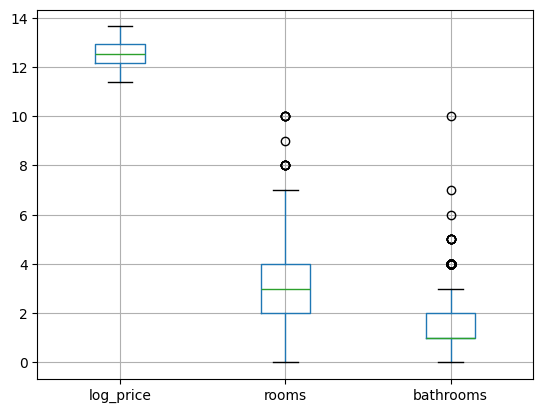

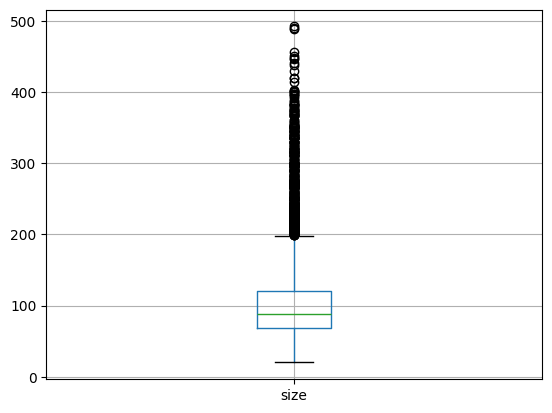

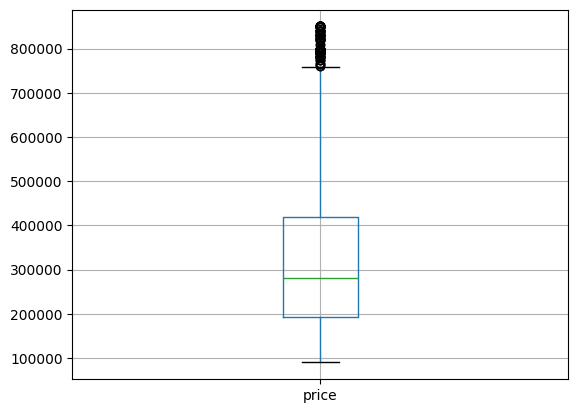

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

df_final[['log_price','rooms','bathrooms']].boxplot()
plt.show()

df_final[['size']].boxplot()
plt.show()

df_final[['price']].boxplot()
plt.show()

In [113]:
df_final.shape

(4829, 13)

In [114]:
def df_to_csv(df,file_path):
    '''
    This function will take a given dataframe and save it as a csv file
    '''
    df = df.reset_index()   # Reset the index in order to organise the records
    df.to_csv(file_path, index=False)   # Save it into a csv
name_file=fr'cleaned_data_08_2025.csv'
file_path=fr'..\data\{name_file}'
df_to_csv(df_final,file_path)